In [ ]:
import matplotlib as mpl
mpl.use('Agg') # run matplotlib without X server (GUI)
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
log_file = 'out_arctic_attcond_valxtest.txt'

measure_to_plot = 'Bleu_4:'
id_to_plot = 'Computing coco scores on the'

In [51]:
data = dict()

f = open(log_file, 'r')
iters_per_val = 1
for line in f:
    if id_to_plot in line:
        line = line.split(' ')[-2].strip()
        last_id = line
        if last_id not in data.keys():
            data[last_id] = []
        
    if measure_to_plot in line:
        line = line.split(' ')[-1].strip()
        data[last_id].append(float(line))
        
    if 'EVAL_EACH_UPDATES' in line:
        line = line.split("'EVAL_EACH_UPDATES': ")[1]
        iters_per_val = int(line.split(",")[0])

[None, None, None, None]

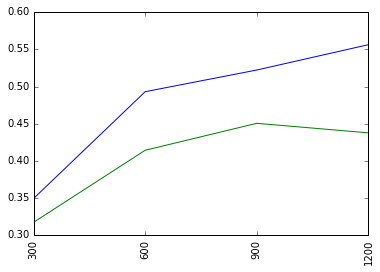

In [53]:
positions = range(iters_per_val,len(vals)*iters_per_val+1, iters_per_val)
for ids, vals in data.iteritems():
    plt.plot(positions, vals)
    
#plt.ylim([0, 1])
plt.xticks(positions)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)